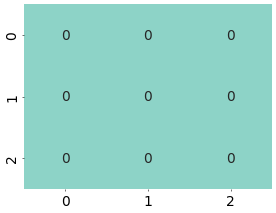

0

In [66]:
# TicTacToe
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcdefaults()
plt.rcParams['figure.dpi']=50
plt.rcParams['font.size']=20

class Thing:
    def __init__(self, name=''):
        self.name = name
    def __repr__(self):
        return self.name

class Problem(Thing):
    def __init__(self, name):
        super().__init__(name)

class GameProblem(Problem):
    def __init__(self, name):
        super().__init__(name)
    def check_win(self):
        pass

class TicTacToe(GameProblem):
    def __init__(self, name):
        super().__init__(name)
        self.map = np.zeros((3,3))
        # self.map = np.random.randint(0,10, (3,3))
    def check_win(self, state_map=None):
        if state_map is None:
            state_map = self.map
        check_map = np.concatenate([state_map.sum(axis=0),
                        state_map.sum(axis=1),
                        [state_map.trace(),
                         np.flip(state_map, axis=1).trace()]])
        if 3 in check_map: # 玩家赢
            return 1
        elif 30 in check_map: # Agent赢
            return 2
        else:
            return 0
    def draw(self):
        sns.heatmap(self.map.clip(0,2),
                    cmap='Set3',
                    center = 0,
                    annot=True,
                    cbar = False
                    )
        plt.show()

game = TicTacToe('1')
game.draw()
game.check_win()

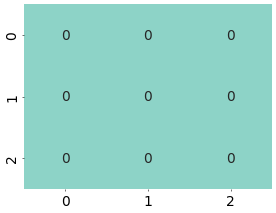

玩家落子: 1 1
Agent落子: 0 1


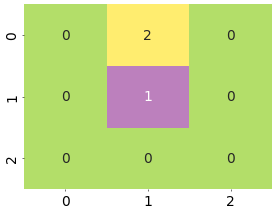

玩家落子: 1 2
Agent落子: 2 0


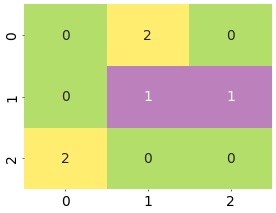

玩家落子: 2 2
Agent落子: 0 2


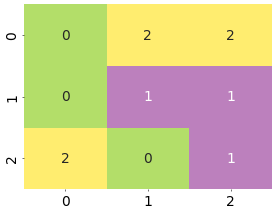

In [59]:
class RandomTicTacToe(TicTacToe):
    def __init__(self, name):
        super().__init__(name)
    def agent_pick(self):
        actions = np.concatenate([(np.where(self.map==0))], axis=1).T
        if len(actions)>0:
            x, y =actions[np.random.randint(0,len(actions))]
            self.map[x, y] = 10
            print("Agent落子:", x,y)
        else:
            print("Agent已经无处落子")
    def pick(self, x, y):
        if self.map[x,y] == 0:
            self.map[x,y] = 1
            print('玩家落子:', x, y)
            self.agent_pick()
        else:
            print('该点已经有棋子')
        if self.check_win()==1:
            print("玩家胜利")
        elif self.check_win()==2:
            print("Agent胜利")
        self.draw()
game = RandomTicTacToe('RandomTicTacToe')
game.draw()
game.pick(1,1)
game.pick(1,2)
game.pick(2,2)

玩家落子: 2 1
Agent落子: 0 0
Agent胜利


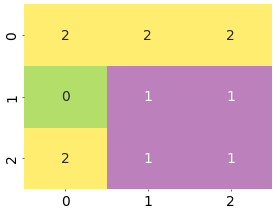

In [60]:
game.pick(2,1)

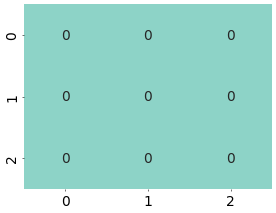

玩家落子: 1 1
[(0, 1, -1), (1, 0, -1), (1, 2, -1), (2, 1, -1), (0, 0, 0), (0, 2, 0), (2, 0, 0), (2, 2, 0)]
Agent落子: 2 2


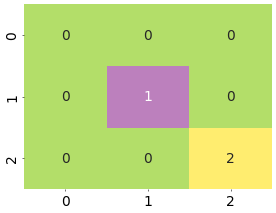

In [73]:
# MiniMax
class MinimaxTicTacToe(TicTacToe):
    def __init__(self, name):
        super().__init__(name)
    def value(self, next_agent, map_state):
        win = self.check_win(map_state)
        if win==1:
            return -1
        elif win==2:
            return 1
        actions = np.concatenate([(np.where(map_state==0))], axis=1).T # self.map
        if len(actions) > 0:
            if next_agent == 'max':
                return self.max_value(actions, map_state)
            elif next_agent == 'min':
                return self.min_value(actions, map_state)
        else:
            return 0
    def max_value(self,actions,map_state):
        v = -100000
        for act in actions:
            map_state_copy = map_state.copy()
            map_state_copy[act[0], act[1]] = 10
            v = max(v, self.value('min', map_state_copy))
        return v
    def min_value(self,actions,map_state):
        v = 100000
        for act in actions:
            map_state_copy = map_state.copy()
            map_state_copy[act[0], act[1]] = 1
            v = min(v, self.value('max', map_state_copy))
        return v
    def agent_pick(self):
        actions = np.concatenate([(np.where(self.map==0))], axis=1).T
        if len(actions)>0:
            act_result = []
            for act in actions:
                map_state_copy = self.map.copy()
                map_state_copy[act[0], act[1]] = 10
                act_result.append((act[0],act[1], self.value('min', map_state_copy)))
            act_result.sort(key=lambda x:x[2])
            print(act_result)
            act_choice = act_result.pop()
            self.map[act_choice[0],act_choice[1]] = 10
            print("Agent落子:", act_choice[0],act_choice[1])
        else:
            print("Agent已经无处落子")
    def pick(self, x, y):
        if self.map[x,y] == 0:
            self.map[x,y] = 1
            print('玩家落子:', x, y)
            self.agent_pick()
        else:
            print('该点已经有棋子')
        if self.check_win()==1:
            print("玩家胜利")
        elif self.check_win()==2:
            print("Agent胜利")
        self.draw()
game = MinimaxTicTacToe('MinimaxTicTacToe')
game.draw()
game.pick(1,1)

玩家落子: 0 1
[(0, 0, -1), (2, 1, 0)]
Agent落子: 2 1


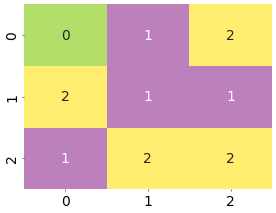

In [76]:
game.pick(0,1)

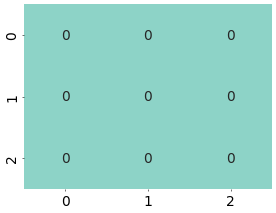

玩家落子: 1 1
[(0, 1, -1), (1, 0, -1), (1, 2, -1), (2, 1, -1), (0, 0, 0), (0, 2, 0), (2, 0, 0), (2, 2, 0)]
Agent落子: 2 2


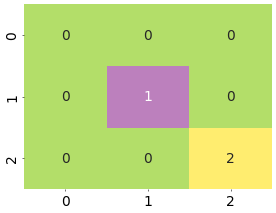

In [80]:
# MiniMax:ab
class MinimaxTicTacToe(TicTacToe):
    def __init__(self, name):
        super().__init__(name)
    def value(self, next_agent, map_state,a,b):
        win = self.check_win(map_state)
        if win==1:
            return -1
        elif win==2:
            return 1
        actions = np.concatenate([(np.where(map_state==0))], axis=1).T # self.map
        if len(actions) > 0:
            if next_agent == 'max':
                return self.max_value(actions, map_state,a,b)
            elif next_agent == 'min':
                return self.min_value(actions, map_state,a,b)
        else:
            return 0
    def max_value(self,actions,map_state,a,b):
        v = -100000
        for act in actions:
            map_state_copy = map_state.copy()
            map_state_copy[act[0], act[1]] = 10
            v = max(v, self.value('min', map_state_copy,a,b))
            if v >=b:
                return v
            a = a if a>v else v
        return v
    def min_value(self,actions,map_state,a,b):
        v = 100000
        for act in actions:
            map_state_copy = map_state.copy()
            map_state_copy[act[0], act[1]] = 1
            v = min(v, self.value('max', map_state_copy,a,b))
            if v <=a:
                return v
            b = b if b<v else v
        return v
    def agent_pick(self):
        actions = np.concatenate([(np.where(self.map==0))], axis=1).T
        if len(actions)>0:
            act_result = []
            for act in actions:
                map_state_copy = self.map.copy()
                map_state_copy[act[0], act[1]] = 10
                act_result.append((act[0],act[1], self.value('min', map_state_copy, -100000, 100000)))
            act_result.sort(key=lambda x:x[2])
            print(act_result)
            act_choice = act_result.pop()
            self.map[act_choice[0],act_choice[1]] = 10
            print("Agent落子:", act_choice[0],act_choice[1])
        else:
            print("Agent已经无处落子")
    def pick(self, x, y):
        if self.map[x,y] == 0:
            self.map[x,y] = 1
            print('玩家落子:', x, y)
            self.agent_pick()
        else:
            print('该点已经有棋子')
        if self.check_win()==1:
            print("玩家胜利")
        elif self.check_win()==2:
            print("Agent胜利")
        self.draw()
game = MinimaxTicTacToe('MinimaxTicTacToe')
game.draw()
game.pick(1,1)

玩家落子: 0 0
Agent已经无处落子


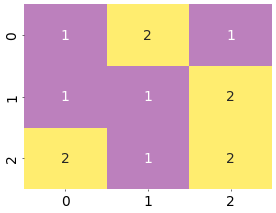

In [85]:
game.pick(0,0)

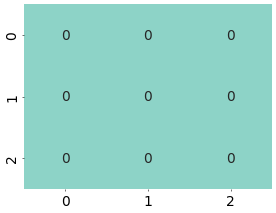

玩家落子: 1 1
[(0, 1, -1470), (1, 0, -1470), (1, 2, -1470), (2, 1, -1470), (0, 0, -1038), (0, 2, -1038), (2, 0, -1038), (2, 2, -1038)]
Agent落子: 2 2


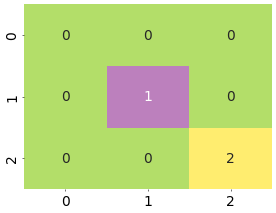

In [86]:
# WinPercent
class WinPercentTicTacToe(TicTacToe):
    def __init__(self, name):
        super().__init__(name)
    def value(self, next_agent, map_state):
        win = self.check_win(map_state)
        if win==1:
            return -1
        elif win==2:
            return 1
        actions = np.concatenate([(np.where(map_state==0))], axis=1).T # self.map
        if len(actions) > 0:
            if next_agent == 'max':
                return self.max_value(actions, map_state)
            elif next_agent == 'min':
                return self.min_value(actions, map_state)
        else:
            return 0
    def max_value(self,actions,map_state):
        v = 0
        for act in actions:
            map_state_copy = map_state.copy()
            map_state_copy[act[0], act[1]] = 10
            v = v + self.value('min', map_state_copy)
        return v
    def min_value(self,actions,map_state):
        v = 0
        for act in actions:
            map_state_copy = map_state.copy()
            map_state_copy[act[0], act[1]] = 1
            v = v + self.value('max', map_state_copy)
        return v
    def agent_pick(self):
        actions = np.concatenate([(np.where(self.map==0))], axis=1).T
        if len(actions)>0:
            act_result = []
            for act in actions:
                map_state_copy = self.map.copy()
                map_state_copy[act[0], act[1]] = 10
                act_result.append((act[0],act[1], self.value('min', map_state_copy)))
            act_result.sort(key=lambda x:x[2])
            print(act_result)
            act_choice = act_result.pop()
            self.map[act_choice[0],act_choice[1]] = 10
            print("Agent落子:", act_choice[0],act_choice[1])
        else:
            print("Agent已经无处落子")
    def pick(self, x, y):
        if self.map[x,y] == 0:
            self.map[x,y] = 1
            print('玩家落子:', x, y)
            self.agent_pick()
        else:
            print('该点已经有棋子')
        if self.check_win()==1:
            print("玩家胜利")
        elif self.check_win()==2:
            print("Agent胜利")
        self.draw()
game = WinPercentTicTacToe('WinPercent')
game.draw()
game.pick(1,1)

玩家落子: 2 1
Agent已经无处落子


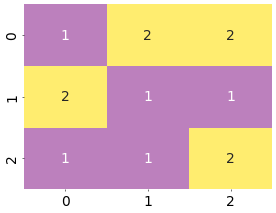

In [90]:
game.pick(2,1)

In [42]:
arr = np.random.randint(0,2, (3,3))
print(arr)
print(arr.sum(axis=0))
print(arr.sum(axis=1))
print(arr.trace())
print(np.flip(arr, axis=1).trace())
np.concatenate([arr.sum(axis=0),
                        arr.sum(axis=1),
                        [arr.trace(),
                         np.flip(arr, axis=1).trace()]])
print(np.concatenate([(np.where(arr==0))], axis=1).T)

[[1 0 1]
 [0 0 1]
 [1 1 0]]
[2 1 2]
[2 1 2]
1
2
[[0 1]
 [1 0]
 [1 1]
 [2 2]]
